In [1]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import tensorflow as tf

In [3]:
data_title = pd.read_csv("df_bow_title.csv")
data_tags = pd.read_csv("df_bow_tags.csv")

In [4]:
data_title=data_title.drop(['Unnamed: 0'], axis=1)
data_tags=data_tags.drop(['Unnamed: 0'], axis=1)

# Word2Vec 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_tags_list(df):
    return df.apply(lambda x: [df.columns[i] for i in range(len(x)) if x[i] == 1], axis=1).tolist()

tags_list = convert_to_tags_list(data_tags)

# Binariser les étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(tags_list)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_title, y, test_size=0.2, random_state=42)

# Utiliser OneVsRestClassifier pour multi-label classification
model = OneVsRestClassifier(MultinomialNB(alpha=1.0))
model.fit(X_train, y_train)

# Prédire les tags pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


C:\Users\Beast-Of-War\AppData\Local\Temp\ipykernel_25472\970543362.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.apply(lambda x: [df.columns[i] for i in range(len(x)) if x[i] == 1], axis=1).tolist()


Accuracy: 0.78
                precision    recall  f1-score   support

     algorithm       0.00      0.00      0.00       113
        amazon       0.00      0.00      0.00        22
       android       0.00      0.00      0.00       548
       angular       0.00      0.00      0.00       147
        apache       0.00      0.00      0.00        58
           api       0.00      0.00      0.00        53
        arrays       0.00      0.00      0.00        68
           asp       0.00      0.00      0.00         0
authentication       0.00      0.00      0.00        20
           aws       0.00      0.00      0.00         5
         azure       0.00      0.00      0.00       212
          boot       0.00      0.00      0.00         4
        chrome       0.00      0.00      0.00         0
         cloud       0.00      0.00      0.00        13
          code       0.00      0.00      0.00        29
       compose       0.00      0.00      0.00         0
          core       0.00      0

e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users

In [9]:
max(y_pred).info

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

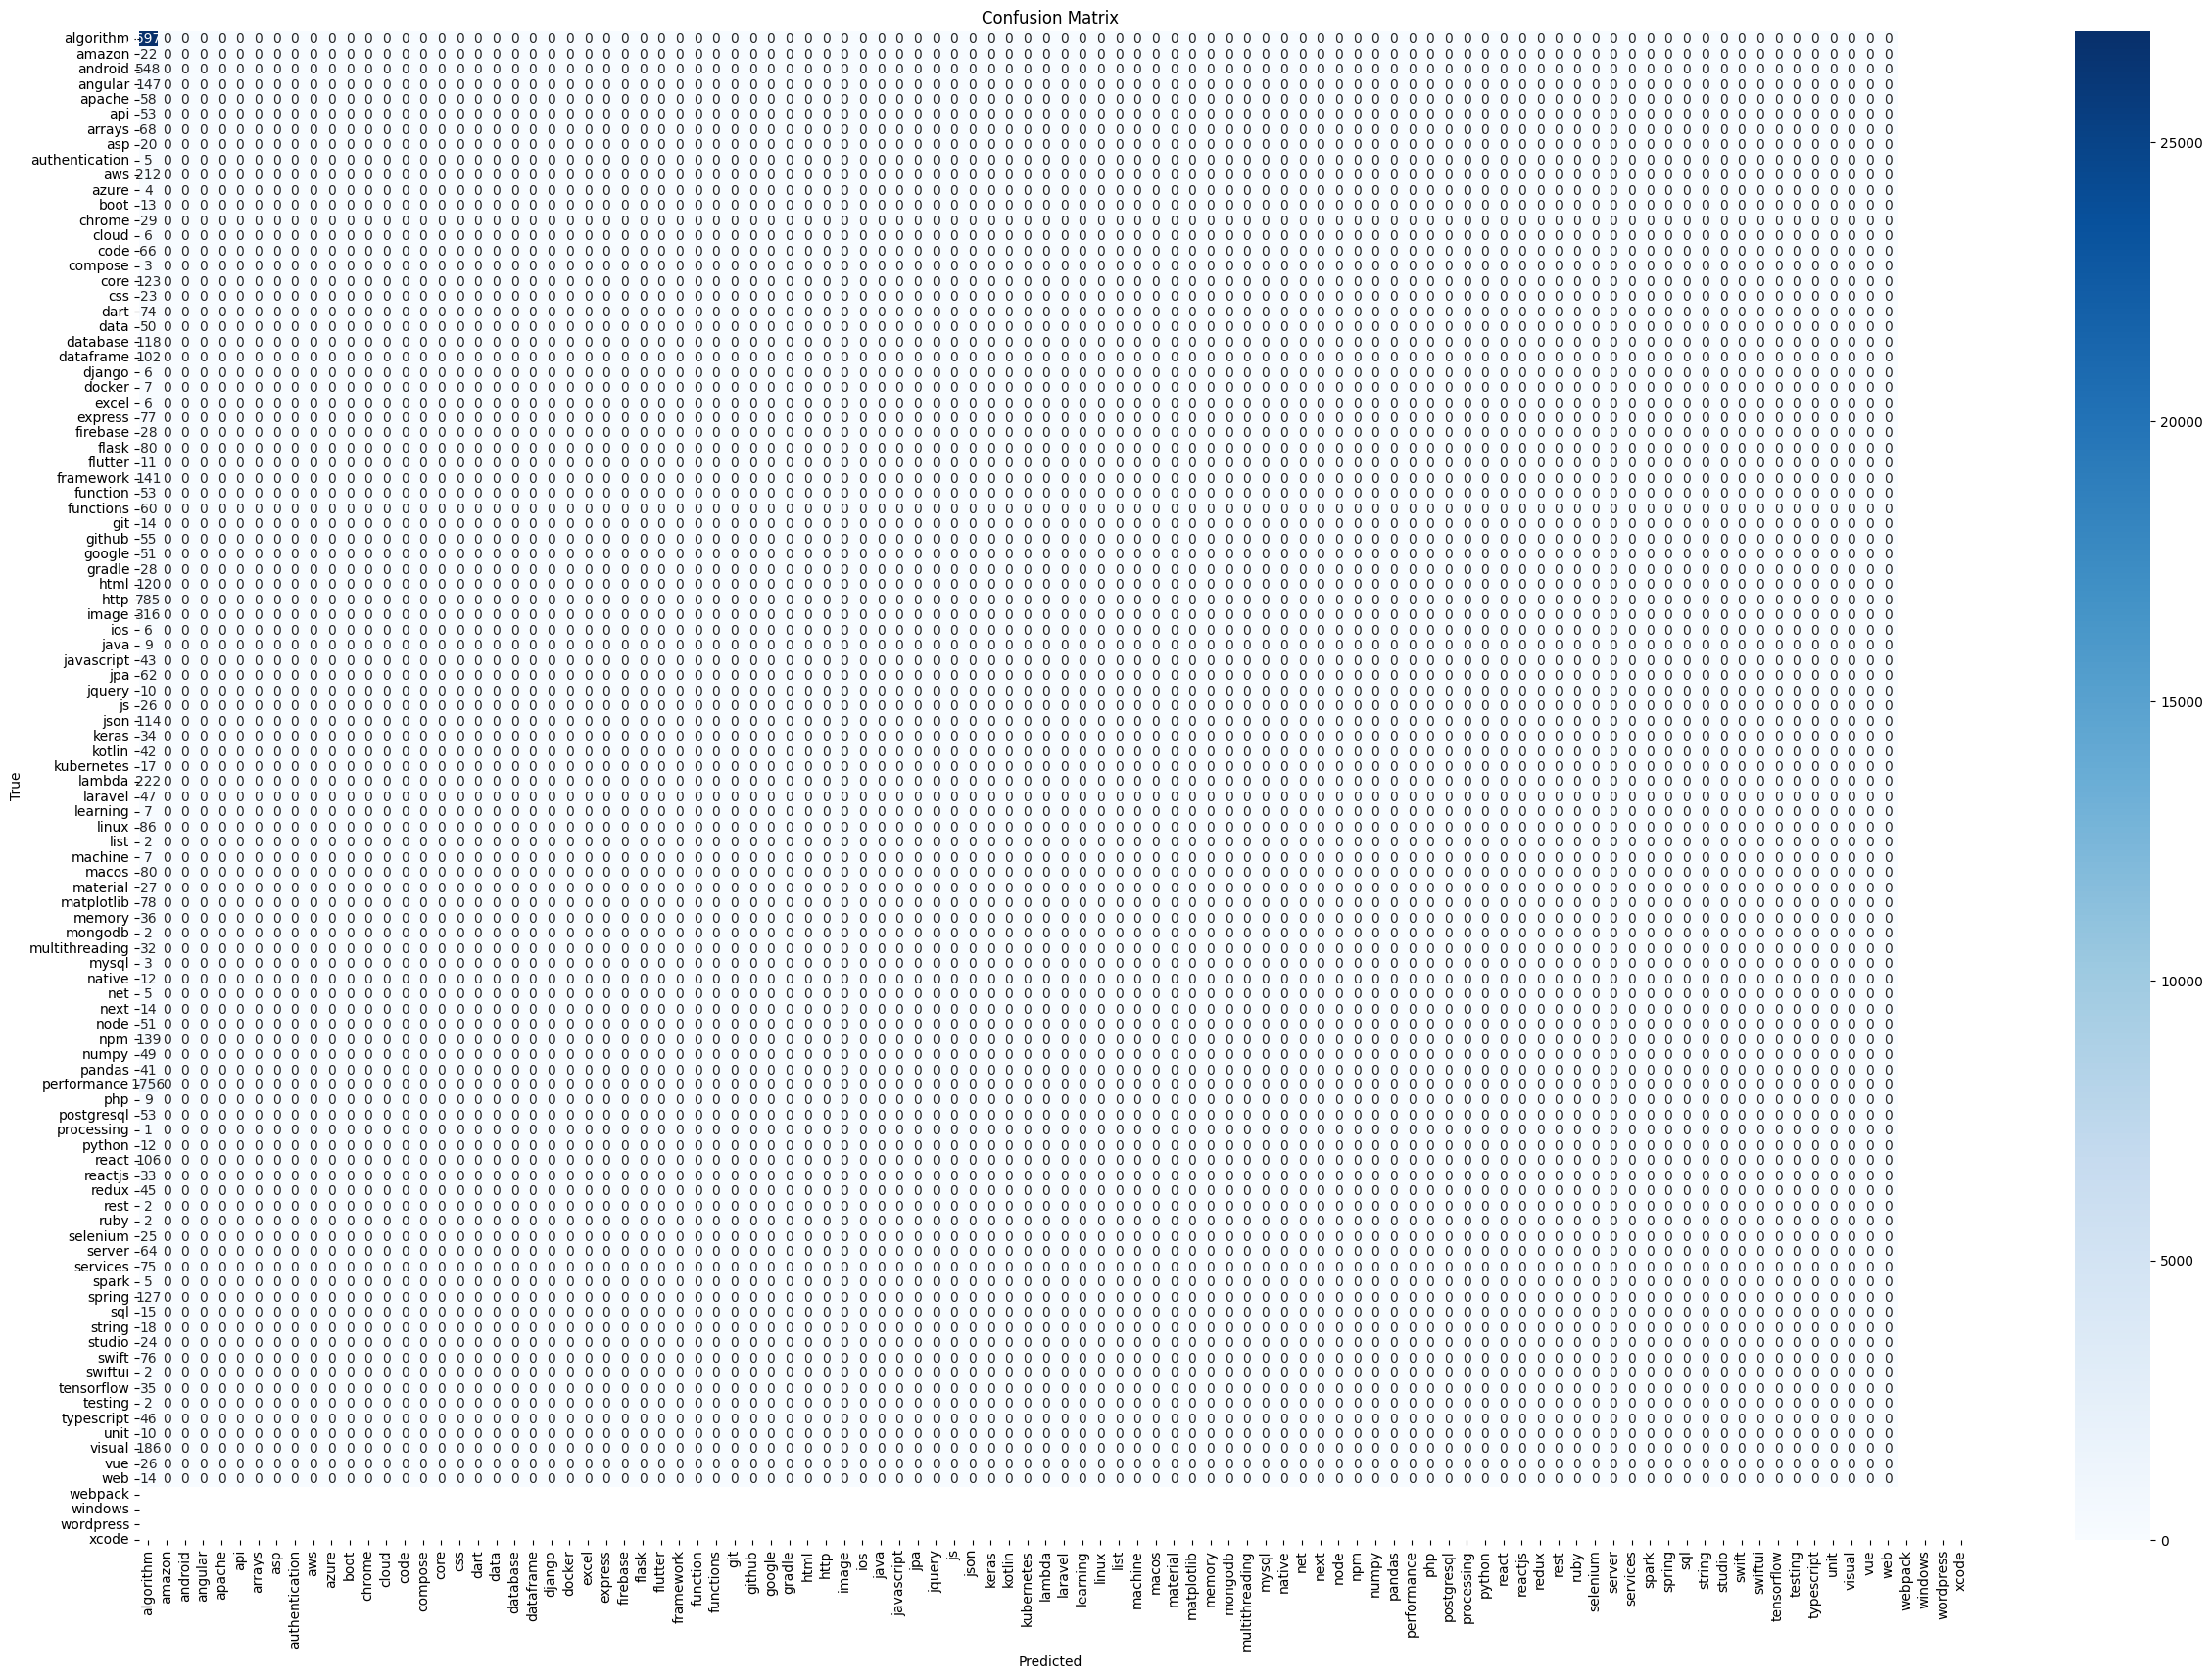

In [6]:
# Tracer la matrice de confusion
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.78
                precision    recall  f1-score   support

     algorithm       0.00      0.00      0.00       113
        amazon       0.00      0.00      0.00        22
       android       0.00      0.00      0.00       548
       angular       0.00      0.00      0.00       147
        apache       0.00      0.00      0.00        58
           api       0.00      0.00      0.00        53
        arrays       0.00      0.00      0.00        68
           asp       0.00      0.00      0.00         0
authentication       0.00      0.00      0.00        20
           aws       0.00      0.00      0.00         5
         azure       0.00      0.00      0.00       212
          boot       0.00      0.00      0.00         4
        chrome       0.00      0.00      0.00         0
         cloud       0.00      0.00      0.00        13
          code       0.00      0.00      0.00        29
       compose       0.00      0.00      0.00         0
          core       0.00      0

e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users

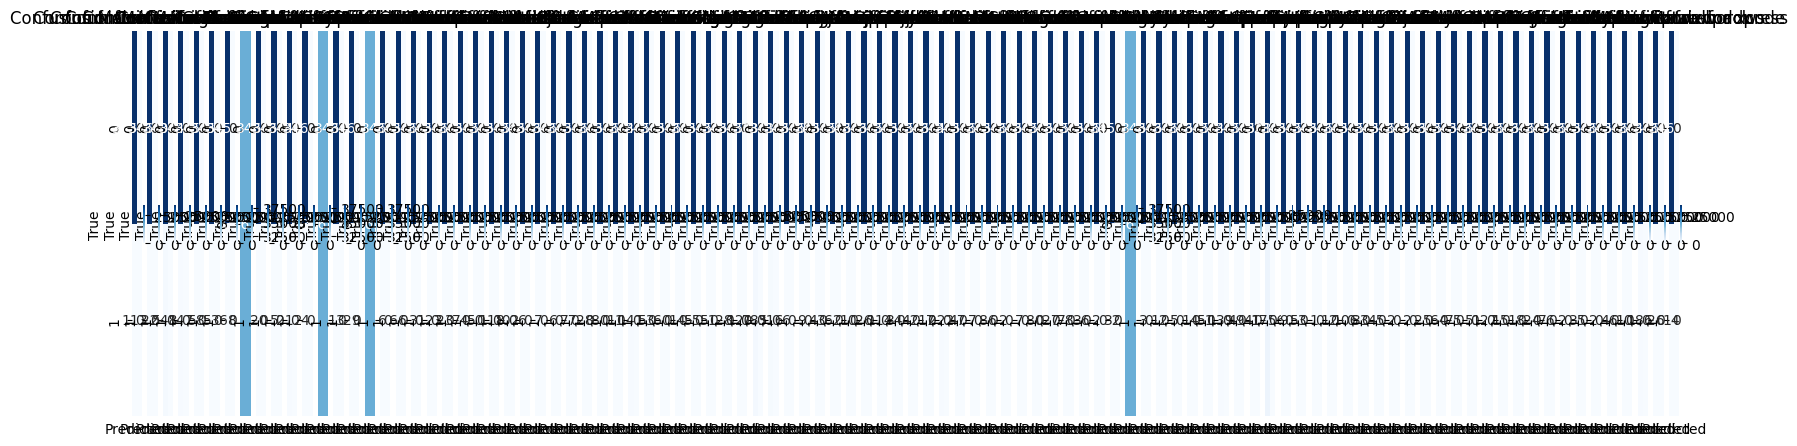

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

# Tracer la matrice de confusion pour chaque label
fig, axes = plt.subplots(nrows=1, ncols=y_test.shape[1], figsize=(20, 5))
for i, ax in enumerate(axes):
    conf_matrix = confusion_matrix(y_test[:, i], y_pred[:, i])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {mlb.classes_[i]}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
plt.tight_layout()
plt.show()

In [8]:
# Tracer la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'label_encoder' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binariser les labels pour la courbe ROC (exemple pour 3 classes)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2])

# Calculer les courbes ROC et les AUC
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Comparaison des performances (exemple pour 3 modèles)
models = [model1, model2, model3]
model_names = ['Naive Bayes', 'SVM', 'Random Forest']
accuracies = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# BERT ?

# USE ?

In [ ]:
print('oui')